## What Spotify genres are the most popular?
by: Isabel Hayes

In this notebook we will be looking at data directly from Spotif in hopes to trace the growth and changes of the post popular podcast genres. The data strarts in 2018 and goes to early 2021. 

In [22]:
from matplotlib import pyplot as plt
import json
from datetime import datetime as dt
import seaborn
import pandas as pd
from scipy import stats

In [23]:
streamsBm = pd.read_csv(r"C:\Users\ihay0\DataTech\monthly_streams_index.csv")

Adding libaries for the anaylist and importing the data froma csv file

In [24]:
streamsBm.head()

,month,standard_categories_list,index
0,Apr 2019,Arts,0.02287
1,Apr 2019,"Arts, Business, Education",0.00012
2,Apr 2019,"Arts, Business, Health & Fitness",0.00015
3,Apr 2019,"Arts, Business, Society & Culture",0.00214
4,Apr 2019,"Arts, Comedy",0.00673


The data is separated by month and year. Each month can one tag attached to it and multiple tags attached per genre. An example of this is that a tag can be a comedy tag or it can be comedy, true crime tags. Listens have been scaled to be in a range from 0 to 1 so something like .01 would have a greater listen rate than .001.

In [25]:
streamsBm['standard_categories_list']

0                                     Arts
1                Arts, Business, Education
2         Arts, Business, Health & Fitness
3        Arts, Business, Society & Culture
4                             Arts, Comedy
                       ...                
10549                    Sports, TV & Film
10550                           Technology
10551                           True Crime
10552                            TV & Film
10553                TV & Film, True Crime
Name: standard_categories_list, Length: 10554, dtype: object

In [26]:
streamsBm['month']

0        Apr 2019
1        Apr 2019
2        Apr 2019
3        Apr 2019
4        Apr 2019
           ...   
10549    Sep 2020
10550    Sep 2020
10551    Sep 2020
10552    Sep 2020
10553    Sep 2020
Name: month, Length: 10554, dtype: object

In [27]:
streams= streamsBm.month.str.split(expand=True)

In [28]:
streams.head()

,0,1
0,Apr,2019
1,Apr,2019
2,Apr,2019
3,Apr,2019
4,Apr,2019


Spliting the dataframe by Month and year and adding the split data to the end of the data frame

In [29]:
streamsBm[['Mon','Year']] = streamsBm['month'].str.split(expand = True)

In [30]:
streamsBm

,month,standard_categories_list,index,Mon,Year
0,Apr 2019,Arts,0.02287,Apr,2019
1,Apr 2019,"Arts, Business, Education",0.00012,Apr,2019
2,Apr 2019,"Arts, Business, Health & Fitness",0.00015,Apr,2019
3,Apr 2019,"Arts, Business, Society & Culture",0.00214,Apr,2019
4,Apr 2019,"Arts, Comedy",0.00673,Apr,2019
...,...,...,...,...,...
10549,Sep 2020,"Sports, TV & Film",0.00220,Sep,2020
10550,Sep 2020,Technology,0.01204,Sep,2020
10551,Sep 2020,True Crime,0.27128,Sep,2020
10552,Sep 2020,TV & Film,0.06240,Sep,2020


Removing repeat data from the dataframe to keep everything concise

In [31]:
streamsBm.drop('month',inplace=True,axis=1)

In [32]:
streamsBm

,standard_categories_list,index,Mon,Year
0,Arts,0.02287,Apr,2019
1,"Arts, Business, Education",0.00012,Apr,2019
2,"Arts, Business, Health & Fitness",0.00015,Apr,2019
3,"Arts, Business, Society & Culture",0.00214,Apr,2019
4,"Arts, Comedy",0.00673,Apr,2019
...,...,...,...,...
10549,"Sports, TV & Film",0.00220,Sep,2020
10550,Technology,0.01204,Sep,2020
10551,True Crime,0.27128,Sep,2020
10552,TV & Film,0.06240,Sep,2020


Spliting the main dataframe into seperate dataframe that are split by the year the data was pulled from.

### 2018

In [33]:
year18 = streamsBm[streamsBm['Year'] == '2018']

In [34]:
year18

,standard_categories_list,index,Mon,Year
601,Arts,0.01664,Aug,2018
602,"Arts, Business, Society & Culture",0.00188,Aug,2018
603,"Arts, Comedy",0.00426,Aug,2018
604,"Arts, Comedy, Education, Society & Culture",0.00022,Aug,2018
605,"Arts, Comedy, Fiction",0.00020,Aug,2018
...,...,...,...,...
9859,Sports,0.13889,Sep,2018
9860,"Sports, TV & Film",0.00035,Sep,2018
9861,Technology,0.00063,Sep,2018
9862,True Crime,0.02656,Sep,2018


### 2019

In [15]:
year19 = streamsBm[streamsBm['Year'] == '2019']

In [16]:
year19

,standard_categories_list,index,Mon,Year
0,Arts,0.02287,Apr,2019
1,"Arts, Business, Education",0.00012,Apr,2019
2,"Arts, Business, Health & Fitness",0.00015,Apr,2019
3,"Arts, Business, Society & Culture",0.00214,Apr,2019
4,"Arts, Comedy",0.00673,Apr,2019
...,...,...,...,...
10178,"Sports, TV & Film",0.00065,Sep,2019
10179,Technology,0.00550,Sep,2019
10180,True Crime,0.19690,Sep,2019
10181,TV & Film,0.03553,Sep,2019


### 2020

In [17]:
year20 = streamsBm[streamsBm['Year'] == '2020']
year20

,standard_categories_list,index,Mon,Year
264,Arts,0.07501,Apr,2020
265,"Arts, Business",0.00015,Apr,2020
266,"Arts, Business, Comedy, News, Technology",0.00015,Apr,2020
267,"Arts, Business, Education",0.00024,Apr,2020
268,"Arts, Business, Health & Fitness",0.00019,Apr,2020
...,...,...,...,...
10549,"Sports, TV & Film",0.00220,Sep,2020
10550,Technology,0.01204,Sep,2020
10551,True Crime,0.27128,Sep,2020
10552,TV & Film,0.06240,Sep,2020


### 2021

In [18]:
year21 = streamsBm[streamsBm['Year'] == '2021']
year21

,standard_categories_list,index,Mon,Year
3028,Arts,0.06901,Feb,2021
3029,"Arts, Business",0.00030,Feb,2021
3030,"Arts, Business, Education",0.00069,Feb,2021
3031,"Arts, Business, Health & Fitness",0.00020,Feb,2021
3032,"Arts, Business, Music",0.00156,Feb,2021
...,...,...,...,...
7061,"Sports, TV & Film",0.00274,Mar,2021
7062,Technology,0.03189,Mar,2021
7063,True Crime,0.30550,Mar,2021
7064,TV & Film,0.10623,Mar,2021


After spliting years I place each year in order of highest listens and ploted the top ten in each year.

### 2018

In [35]:
ascen18 = year18.sort_values( by='index', ascending=False)
ascen18.head(10)


,standard_categories_list,index,Mon,Year
1563,Comedy,0.22692,Dec,2018
7896,Comedy,0.21267,Nov,2018
8807,Comedy,0.19624,Oct,2018
666,Comedy,0.17648,Aug,2018
8949,Sports,0.16444,Oct,2018
9723,Comedy,0.16423,Sep,2018
4435,Comedy,0.15934,Jul,2018
8039,Sports,0.15209,Nov,2018
1712,Sports,0.14615,Dec,2018
9859,Sports,0.13889,Sep,2018


<AxesSubplot:>

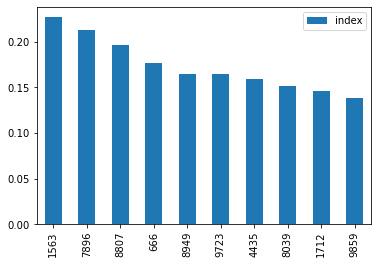

In [38]:
plot18 = ascen18.head(10)
plot18.plot.bar()

### 2019

In [39]:
ascen19 = year19.sort_values( by='index', ascending=False)
ascen19.head(10)

,standard_categories_list,index,Mon,Year
9064,Comedy,0.59977,Oct,2019
1823,Comedy,0.58725,Dec,2019
8151,Comedy,0.58141,Nov,2019
9242,News,0.57657,Oct,2019
920,Comedy,0.52178,Aug,2019
8330,News,0.50691,Nov,2019
9974,Comedy,0.50473,Sep,2019
10144,News,0.50111,Sep,2019
4678,Comedy,0.48471,Jul,2019
1085,News,0.46095,Aug,2019


<AxesSubplot:>

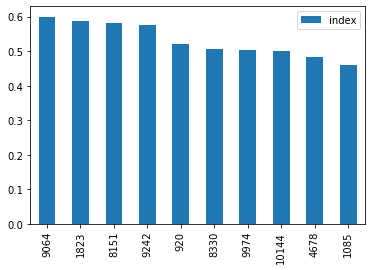

In [41]:
plot19 = ascen19.head(10)
plot19.plot.bar()

### 2020

In [42]:
ascen20 = year20.sort_values( by='index', ascending=False)
ascen20.head(10)

,standard_categories_list,index,Mon,Year
9610,News,1.00000,Oct,2020
8692,News,0.87176,Nov,2020
1237,Comedy,0.87100,Aug,2020
10509,News,0.85720,Sep,2020
4993,Comedy,0.85058,Jul,2020
9398,Comedy,0.83374,Oct,2020
1453,News,0.83320,Aug,2020
2164,Comedy,0.81778,Dec,2020
6630,News,0.79995,Mar,2020
5198,News,0.78405,Jul,2020


<AxesSubplot:>

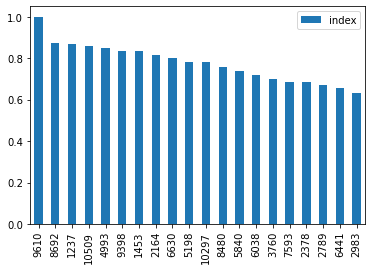

In [44]:
plot20 =ascen20.head(20)
plot20.plot.bar()

### 2021

In [45]:
ascen21 = year21.sort_values( by='index', ascending=False)
ascen21.head(10)

,standard_categories_list,index,Mon,Year
6800,Comedy,0.91384,Mar,2021
4325,News,0.84628,Jan,2021
4110,Comedy,0.82863,Jan,2021
7017,News,0.80905,Mar,2021
3143,Comedy,0.80256,Feb,2021
3355,News,0.74274,Feb,2021
7059,Sports,0.47580,Mar,2021
6865,"Comedy, Society & Culture",0.45534,Mar,2021
4366,Sports,0.43483,Jan,2021
4172,"Comedy, Society & Culture",0.42513,Jan,2021


<AxesSubplot:>

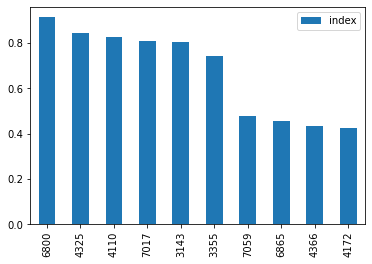

In [46]:
plot21 = ascen21.head(10)
plot21.plot.bar()